In [114]:
import pandas as pd
import numpy as np
import mne
%matplotlib inline 
# magic command to display plots inline. In case of matplotlib errors on linux, try %matplotlib qt
import matplotlib
from matplotlib import pyplot as plt


In [20]:
ave            = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_ave.fif'
cov            = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_cov.fif'
epo            = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_epo.fif'
ica            = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_ica.fif'
proc_clean_epo = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_proc-clean_epo.fif'
proc_filt_raw  = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_proc-filt_raw.fif'
proc_ica_epo   = 'Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_proc-ica_epo.fif'

In [27]:
rawfif = mne.io.read_raw_fif(proc_filt_raw)

Opening raw data file Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_proc-filt_raw.fif...
    Range : 0 ... 3161619 =      0.000 ...  3161.619 secs
Ready.


In [10]:
rawfif

Measurement date,"March 18, 2022 13:52:02 GMT"
Experimenter,Unknown
Participant,sub-27
Digitized points,34 points
Good channels,31 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.10 Hz
Lowpass,50.00 Hz


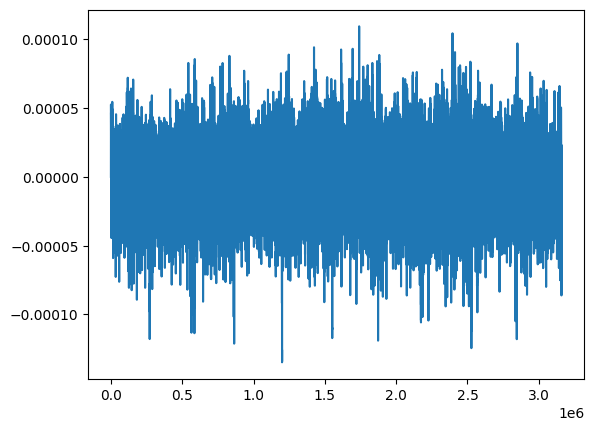

In [30]:
plt.plot(rawfif[10,:][0].T)

In [107]:
# manually loading epochs 
# epochs = mne.read_epochs("Dataset/ds004147/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_proc-clean_epo.fif", preload=True)
# win-locked - some basic plots
# epochs["S 16"].plot_image(picks=["FCz"],show=True,fig=None,title="S 16")
# epochs["S 26"].plot_image(picks=["FCz"],show=True,fig=None,title="S 26")
# evoked = epochs["S  6"].average()
# evoked.plot_image(show=True)
# evoked.ch_names

In [109]:
# load epochs from saved file
# epochs_ave = mne.Evoked("Dataset/ds004147-filtered-update/derivatives/mne-bids-pipeline/sub-27/eeg/sub-27_task-casinos_ave.fif",proj=False,verbose=True)
# ,condition="Stimulus/S  6 - Stimulus/S  7"
# epochs_ave.ch_names
# epochs_ave.pick(picks=["FCz"])
# epochs_ave.plot()

# full list of conditions
# cond_list = [
#     "Stimulus/S  2",
# "Stimulus/S  6",
# "Stimulus/S  7",
# "Stimulus/S 12",
# "Stimulus/S 16",
# "Stimulus/S 17",
# "Stimulus/S 22",
# "Stimulus/S 26",
# "Stimulus/S 27",
# "Stimulus/S 32",
# "Stimulus/S 36",
# "Stimulus/S 37",
# "Stimulus/S  6 - Stimulus/S  7",
# "Stimulus/S 16 - Stimulus/S 17",
# "Stimulus/S 26 - Stimulus/S 27",
# "Stimulus/S 36 - Stimulus/S 37"
# ]

In [119]:
derivs_path = "Dataset/ds004147-filtered-update/derivatives/"
epochs_ave_all = []
cond_list = [ # contrasts between win and loss for each task-cue combination
"Stimulus/S  6 - Stimulus/S  7",
"Stimulus/S 16 - Stimulus/S 17",
"Stimulus/S 26 - Stimulus/S 27",
"Stimulus/S 36 - Stimulus/S 37"
]
sub_list = ["27","28","29","30","31","32","33","34","35","36","37","38"]
grand_avgs = []
# for each condition (task-cue combination), create a list of evoked responses across all subjects and then average
for i in range(0,len(cond_list)):
    print(i)
    for sub in sub_list:
        epochs_ave_all.append([])
        epochs_ave_all[i].append(mne.Evoked(derivs_path+"mne-bids-pipeline/sub-"+sub+"/eeg/sub-"+sub+"_task-casinos_ave.fif",proj=False,verbose=False,condition=cond_list[i]))
    grand_avgs.append(mne.grand_average(epochs_ave_all[i])) # for this condition, average across subjects
    grand_avgs[i].comment=cond_list[i] # name of the condition/difference curve, so that it shows up in the plot
    
# grand_average = mne.grand_average(epochs_ave_all[0]) # single condition (e.g. first condition)
# print(grand_average)
# grand_average.plot()
len(sub_list), len(epochs_ave_all), len(grand_avgs) # just to check if the right number of results come out

0
Identifying common channels ...
1
Identifying common channels ...
2
Identifying common channels ...
3
Identifying common channels ...


(12, 48, 4)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


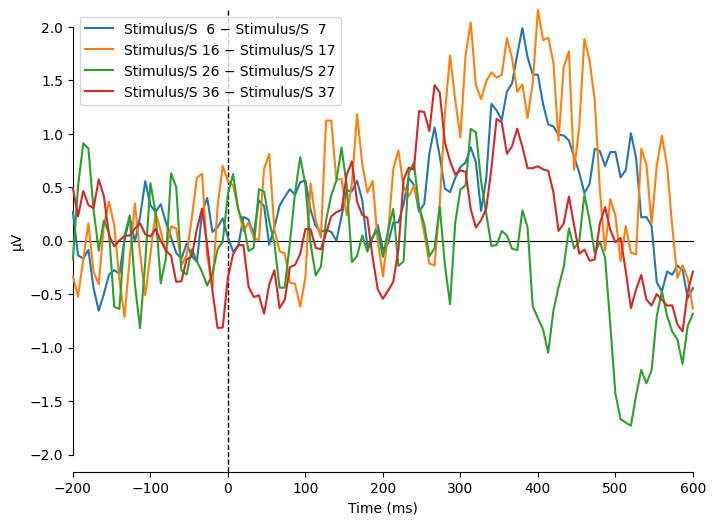

[<Figure size 800x600 with 1 Axes>]

In [120]:
mne.viz.plot_compare_evokeds(
    ga,
    # picks="FCz",
    # colors=dict(aud=0, vis=1),
    # linestyles=dict(left="solid", right="dashed"),
    combine="mean", # average erp across channels
    time_unit="ms",
)